# Skill vs. Luck

## Single Trial

In [58]:
# Define the total score of a candidate as the sum of their skill and luck scores, weighted by a certain amount
def total_score(
        skill_score: float,
        luck_score: float,
        luck_weight: float = 0.05):
    
    return ((1.0-luck_weight) * skill_score) + (luck_weight * luck_score)

In [59]:
# Total population of candidates
population = 1000000

Text(0, 0.5, 'Number of Candidates')

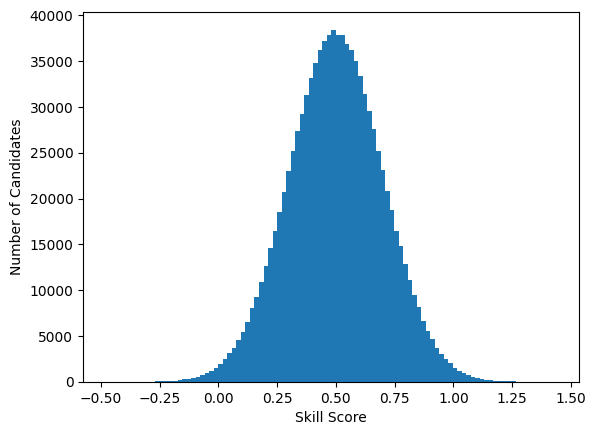

In [60]:
# Generate a random skill score for each candidate with a normal distribution
import numpy as np
skill_scores = np.random.normal(0.5, 0.2, population)

# plot the distribution of skill scores
import matplotlib.pyplot as plt 
_ = plt.hist(skill_scores, bins=100)
plt.xlabel('Skill Score')
plt.ylabel('Number of Candidates')

Text(0, 0.5, 'Number of Candidates')

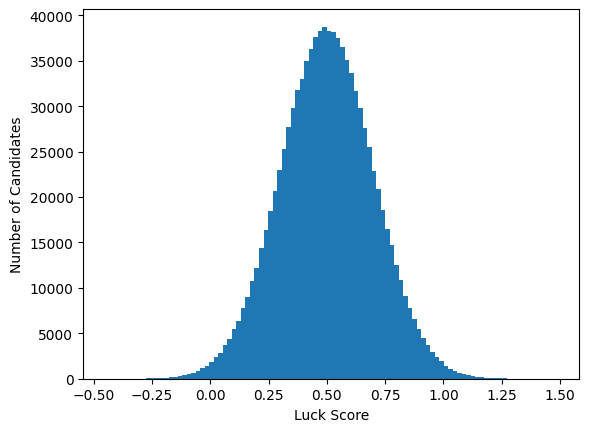

In [61]:
# Generate a random luck score for each candidate with a normal distribution
luck_scores = np.random.normal(0.5, 0.2, population)

#plot the distribution of luck scores
_ = plt.hist(luck_scores, bins=100)
plt.xlabel('Luck Score')
plt.ylabel('Number of Candidates')

Text(0, 0.5, 'Number of Candidates')

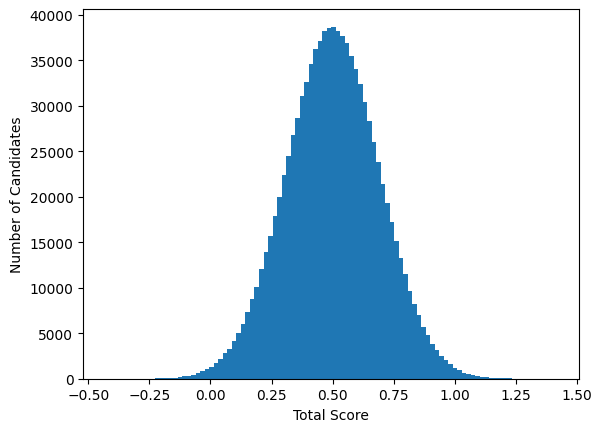

In [62]:
luck_weight = 0.05 # 5% of the total score is based on luck
total_scores = total_score(skill_scores, luck_scores)

#plot the distribution of total scores
_ = plt.hist(total_scores, bins=100)
plt.xlabel('Total Score')
plt.ylabel('Number of Candidates')

Text(0, 0.5, 'Total Score')

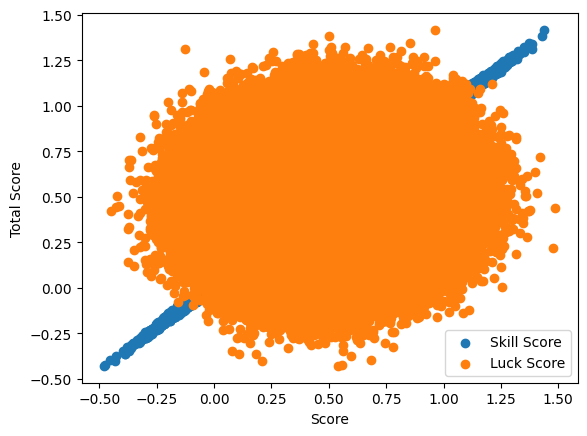

In [63]:
# for each candidate, plot the skill score against the total score
plt.scatter(skill_scores, total_scores)
plt.scatter(luck_scores, total_scores)
plt.legend(['Skill Score', 'Luck Score'])
plt.xlabel('Score')
plt.ylabel('Total Score')

Because of the low percentage (5%) of luck, the total score is highly correlated with skill and less so with luck.

Let's see now what happens when there is a selection process that only selects a small number of candidates.

In [64]:
# define the number of candidates to select
num_candidates = 10

In [65]:
# define a function to select the top candidates
def select_top_candidates(total_scores, num_candidates):
    return np.argsort(total_scores)[::-1][:num_candidates]

In [66]:
selected_candidates = select_top_candidates(total_scores, num_candidates)

In [67]:
selected_candidates

array([621298, 494407, 222426, 713410, 907690, 758609, 653075, 386173,
        96052, 328700])

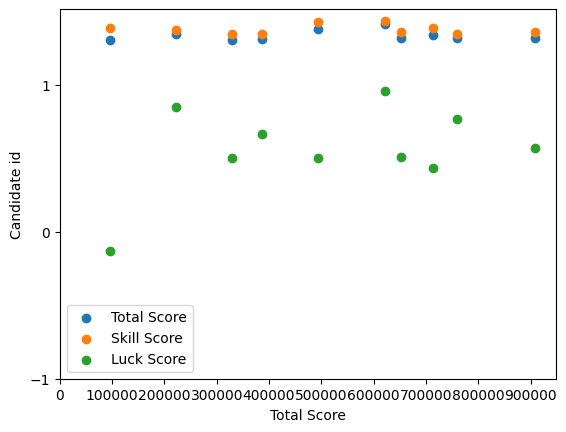

In [68]:
# plot the total scores of the top candidates
plt.scatter(selected_candidates, total_scores[selected_candidates])
plt.scatter(selected_candidates, skill_scores[selected_candidates])
plt.scatter(selected_candidates, luck_scores[selected_candidates])
plt.legend(['Total Score', 'Skill Score', 'Luck Score'])
plt.xlabel('Total Score')
plt.ylabel('Candidate id')
plt.xticks(range(0, population, 100000))
plt.yticks(range(-1, 2, 1))
plt.show()

In [69]:
# define a function that generates the skill, luck, and total scores for a population of candidates given the population size, and the weight of luck
def generate_scores(
        population:int=1000000, 
        luck_weight:int=0.05):
    
    skill_scores = np.random.normal(0.5, 0.2, population)
    luck_scores = np.random.normal(0.5, 0.2, population)
    total_scores = total_score(skill_scores, luck_scores, luck_weight)
    return skill_scores, luck_scores, total_scores

## Multiple Trials

In [48]:
number_of_trials = 100

In [49]:
population = 1000000
luck_weight = 0.05
num_candidates = 10

selection_results = []
entire_population = []

from tqdm.auto import tqdm

for i in tqdm(range(number_of_trials)):
    skill, luck, total = generate_scores(population, luck_weight)
    entire_population.append({
        'skill': skill,
        'luck': luck,
        'total': total
    })
    selected_candidates = select_top_candidates(total, num_candidates)
    selection_results.append({
        'skill': skill[selected_candidates],
        'luck': luck[selected_candidates],
        'total': total[selected_candidates]
    })


  0%|          | 0/100 [00:00<?, ?it/s]

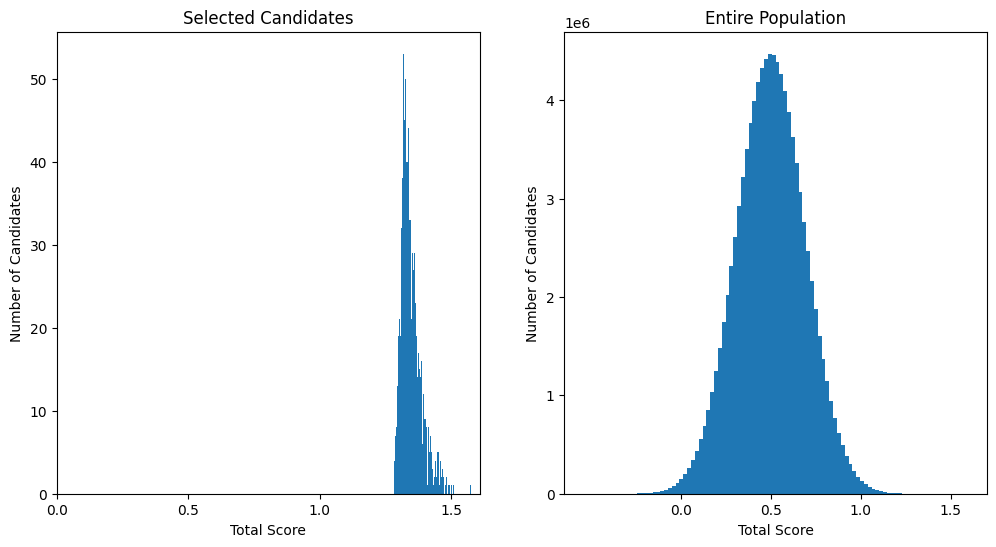

In [54]:
# plot the distribution of the total scores of the top candidates
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
selected_total_scores = np.array([result['total'] for result in selection_results]).flatten()
_ = plt.hist(selected_total_scores, bins=100)
plt.xlabel('Total Score')
plt.ylabel('Number of Candidates')
_ = plt.xticks(np.arange(0, 2.0, 0.5))
plt.title('Selected Candidates')
plt.subplot(1, 2, 2)
entire_population_total_scores = np.array([result['total'] for result in entire_population]).flatten()
_ = plt.hist(entire_population_total_scores, bins=100)
plt.xlabel('Total Score')
plt.ylabel('Number of Candidates')
_ = plt.xticks(np.arange(0, 2.0, 0.5))
plt.title('Entire Population')
plt.show()

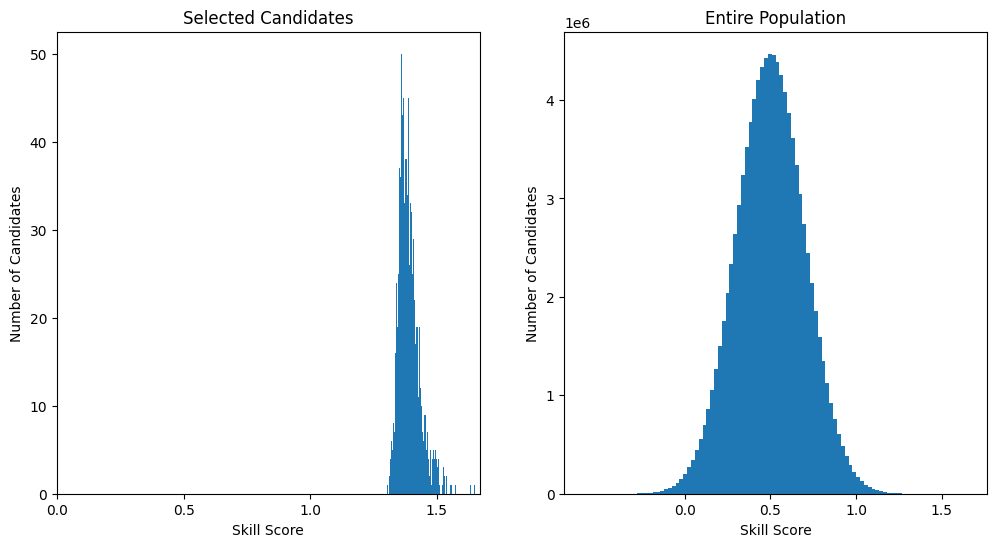

In [56]:
# plot the distribution of the skill scores of the top candidates
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
selected_skill_scores = np.array([result['skill'] for result in selection_results]).flatten()
_ = plt.hist(selected_skill_scores, bins=100)
plt.xlabel('Skill Score')
plt.ylabel('Number of Candidates')
_ = plt.xticks(np.arange(0, 2.0, 0.5))
plt.title('Selected Candidates')
plt.subplot(1, 2, 2)
entire_population_skill_scores = np.array([result['skill'] for result in entire_population]).flatten()
_ = plt.hist(entire_population_skill_scores, bins=100)
plt.xlabel('Skill Score')
plt.ylabel('Number of Candidates')
_ = plt.xticks(np.arange(0, 2.0, 0.5))
plt.title('Entire Population')
plt.show()

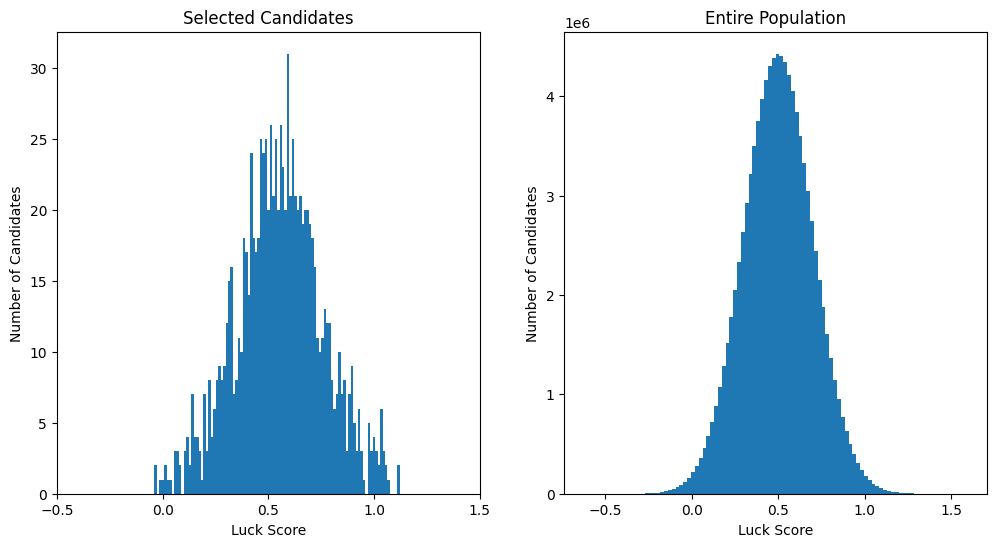

In [57]:
# plot the luck scores of the top candidates
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
selected_luck_scores = np.array([result['luck'] for result in selection_results]).flatten()
_ = plt.hist(selected_luck_scores, bins=100)
plt.xlabel('Luck Score')
plt.ylabel('Number of Candidates')
_ = plt.xticks(np.arange(-0.5, 2.0, 0.5))
plt.title('Selected Candidates')
plt.subplot(1, 2, 2)
entire_population_luck_scores = np.array([result['luck'] for result in entire_population]).flatten()
_ = plt.hist(entire_population_luck_scores, bins=100)
plt.xlabel('Luck Score')
plt.ylabel('Number of Candidates')
_ = plt.xticks(np.arange(-0.5, 2.0, 0.5))
plt.title('Entire Population')
plt.show()